# Normal Distribution

This notebook serves as an introduction to univariate (jednowymiarowy) and multivariate (wielowymiarowy) normal 
(Gaussian) distributions. Understanding these distributions, particularly the 
role of the mean and standard deviation (odchylenie standardowe) /covariance matrix, is fundamental for 
grasping (dla uchwycenia) how certain optimization algorithms, like the Covariance Matrix 
Adaptation Evolution Strategy (CMA-ES), explore the search space.

### Recommended Reading:
1. [Are You Normal? Hint: No.](https://allendowney.github.io/ProbablyOverthinkingIt/gaussian.html)
2. 3Blue1Brown [But what is the Central Limit Theorem?](https://www.youtube.com/watch?v=zeJD6dqJ5lo)

## 1. Setup and Imports
 
First, let's import the necessary libraries and configure the plotting settings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

sns.set_style('darkgrid')
np.random.seed(42)

## 2. The Univariate Normal (Gaussian) Distribution

The simplest case is the one-dimensional, or [univariate, normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). It's perhaps the most common probability distribution.

### Definition
It's characterized by two parameters:
1.  **Mean ($\mu$)**: This represents the center or expected value of the distribution. It dictates where the peak of the bell curve (krzywa dzwonowa) is located.
2.  **Variance ($\sigma^2$)**: This measures the spread (rozpiętość) or dispersion (dyspersje - rozproszenie) of the distribution. A higher variance means the distribution is wider (szeroki); a lower variance means it's narrower.

The **standard deviation ($\sigma$)** is simply the square root of the variance ($\sigma = \sqrt{\sigma^2}$). It provides a measure of the typical distance of data points from the mean.

We denote this distribution as $\mathcal{N}(\mu, \sigma)$.

### Probability Density Function (PDF) (funkcja gęstości prawdopodobieństwa)

The shape of the bell curve is defined by the [Probability Density Function (PDF)](https://en.wikipedia.org/wiki/Probability_density_function) (pl. gęstość prawdopodobieństwa). For a given value $x$, the probability density is calculated as:

$$p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}$$

The term $\frac{1}{\sqrt{2\pi\sigma^2}}$ is a normalization constant that ensures the total area under the curve integrates to 1. The `exp(...)` term creates the characteristic bell shape, centered at $\mu$ and scaled by $\sigma$.

### Exercise 1: Implement the Univariate PDF

Manually implement the PDF function for the univariate normal distribution. Your function should take `x` (a NumPy array, multiple values), `mean`, and `sigma` (standard deviation) as input.

Compare the output of your function for a few test cases (przypadki testowe) against the `scipy.stats.norm.pdf`.

In [4]:
def univariate_normal_pdf(x: np.ndarray, mean: float, std_dev: float) -> np.ndarray:
    coefficient = 1 / (np.sqrt(2 * np.pi * std_dev**2 ))
    exponent = np.exp(-((x - mean)**2) / (2 * std_dev**2))
    return coefficient * exponent

In [9]:
test_x = np.array([-1, 0, 1, 2])
test_mean = 0
test_sigma = 1

pdf_output = univariate_normal_pdf(test_x, mean=test_mean, std_dev=test_sigma)
scipy_pdf_output = stats.norm.pdf(test_x, loc=test_mean, scale=test_sigma)

print("Test x values:", test_x)
print("Your PDF output:    ", pdf_output)
print("Scipy PDF output:   ", scipy_pdf_output)

# Check if outputs are close (allowing for floating point differences)
print("\nAre outputs close (Your vs Scipy)?", np.allclose(pdf_output, scipy_pdf_output))

Test x values: [-1  0  1  2]
Your PDF output:     [0.24197072 0.39894228 0.24197072 0.05399097]
Scipy PDF output:    [0.24197072 0.39894228 0.24197072 0.05399097]

Are outputs close (Your vs Scipy)? True


Observe how changing $\mu$ shifts the curve left or right, and changing $\sigma$ changes its width and height (while maintaining (utrzymanie) the total area of 1).

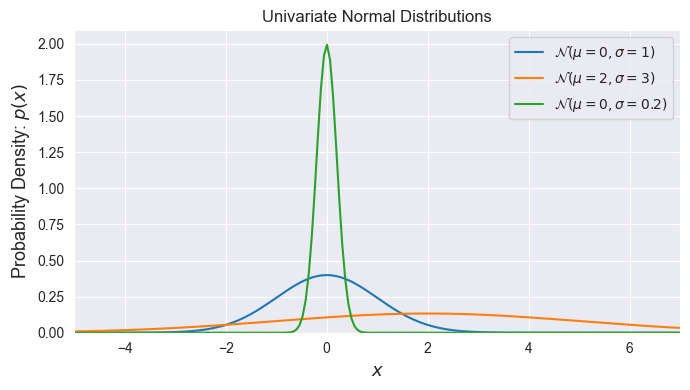

In [10]:
x_vals = np.linspace(-5, 7, num=200)
fig = plt.figure(figsize=(7, 4))

plt.plot(x_vals, univariate_normal_pdf(x_vals, mean=0, std_dev=1), 
         label="$\mathcal{N}(\mu=0, \sigma=1)$")
plt.plot(x_vals, univariate_normal_pdf(x_vals, mean=2, std_dev=3), 
         label="$\mathcal{N}(\mu=2, \sigma=3)$")
plt.plot(x_vals, univariate_normal_pdf(x_vals, mean=0, std_dev=0.2), 
         label="$\mathcal{N}(\mu=0, \sigma=0.2)$")

plt.xlabel('$x$', fontsize=13)
plt.ylabel('Probability Density: $p(x)$', fontsize=13)
plt.title('Univariate Normal Distributions')
plt.ylim(bottom=0)
plt.xlim(x_vals.min(), x_vals.max())
plt.legend(loc='best')
fig.tight_layout() # Adjust layout
plt.show()

In a graph of a PDF, `x` is the specific outcome (konkretna wartość) or value along the bottom (wartość wzdłuź dolnej części), and `y` is its associated (odpowiadająca) 'density,' indicating (wskazująca) how concentrated the probability is right at that point `x`.

### Exercise 2: The 3-Sigma Rule

Motivation: How to interpret $\sigma$?

The standard deviation ($\sigma$) gives us a standardized way to understand the spread. The [68-95-99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), or "3-sigma rule", states that for a normal distribution:
- Approximately (około) **68%** of the data falls within **1** standard deviation of the mean ($\mu \pm 1\sigma$).
- Approximately **95%** of the data falls within **2** standard deviations of the mean ($\mu \pm 2\sigma$).
- Approximately **99.7%** of the data falls within **3** standard deviations of the mean ($\mu \pm 3\sigma$).

We will verify these rules empirically by sampling.

**Task:**

- **Generate Samples:** Draw (wylosuj) a large number of samples (e.g., N = 10,000) from a standard normal distribution $\mathcal{N}(0, 1)$ using `np.random.normal`.
- **Count Samples in Intervals:** For each interval ($\mu \pm 1\sigma$, $\mu \pm 2\sigma$, $\mu \pm 3\sigma$), count how many of your generated samples fall within that range.
- **Calculate Proportions:** Calculate the proportion (or percentage) of samples that fall into each interval (count / total number of samples).
- **Compare:** Print your calculated proportions and compare them to the theoretical values (68%, 95%, 99.7%).

**Interpretation Questions:**

How close are your empirical results to the theoretical percentages?
Why might your results not match the theoretical values exactly?
(Optional) Try running the code again with a much smaller N (e.g., 100) and a much larger N (e.g., 1,000,000). How does the number of samples affect the accuracy of your empirical verification?

In [20]:
def three_sigma_rule_challenge(sample_size):
    mean = 0
    std_dev = 1

    count_within_1_sigma = 0
    count_within_2_sigma = 0
    count_within_3_sigma = 0

    sample_size = sample_size

    samples = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

    for sample in samples:
        if (mean - std_dev <= sample <= mean + std_dev):
            count_within_1_sigma += 1
        if (mean - 2*std_dev <= sample <= mean + 2*std_dev):
            count_within_2_sigma += 1
        if (mean - 3*std_dev <= sample <= mean + 3*std_dev):
            count_within_3_sigma += 1

    proportion_within_1_sigma = count_within_1_sigma / sample_size
    proportion_within_2_sigma = count_within_2_sigma / sample_size
    proportion_within_3_sigma = count_within_3_sigma / sample_size

    print(f"Sample size: {sample_size} | Proportion for interval μ±σ: {proportion_within_1_sigma * 100:.2f}%, μ±2σ: {proportion_within_2_sigma * 100:.2f}%, μ±3σ: {proportion_within_3_sigma * 100:.2f}%")

In [21]:
three_sigma_rule_challenge(sample_size=1000000)
three_sigma_rule_challenge(sample_size=10000)
three_sigma_rule_challenge(sample_size=100)

Sample size: 1000000 | Proportion for interval μ±σ: 68.31%, μ±2σ: 95.43%, μ±3σ: 99.74%
Sample size: 10000 | Proportion for interval μ±σ: 68.56%, μ±2σ: 95.32%, μ±3σ: 99.76%
Sample size: 100 | Proportion for interval μ±σ: 75.00%, μ±2σ: 97.00%, μ±3σ: 100.00%


According to the empirical rule for a normal distribution:  
- ~68.27% of values lie within **μ ± 1σ**  
- ~95.45% within **μ ± 2σ**  
- ~99.73% within **μ ± 3σ**  


The empirical results are close to the theoretical percentages (sample size = 10,000).  
For 1 standard deviation from the mean, the difference is +0.24 percentage points.  
For 2 standard deviations from the mean, the difference is -0.13 percentage points.  
For 3 standard deviations from the mean, the difference is +0.03 percentage points.   

My values do not match the theoretical values exactly because it depends on the number of samples.   
The theoretical values are calculated assuming an infinite number of samples. When we take only 10,000 samples,   
it's possible to get results close to the theoretical ones, but randomness makes it unlikely to match them exactly.  
  
If we take a larger number of samples, we get values closer to the theoretical ones.

## 3. The Central Limit Theorem (CLT)

We've seen the definition and shape of the normal distribution. But *why* is
it so important and common in nature and statistics? The Central Limit Theorem
provides a powerful answer.

### 3.1 Theory: Why is the Normal Distribution Everywhere?

The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)
is a cornerstone (kamień węgielny) of probability theory. In simple terms (w uproszczeniu),  
it states that (to stwierdza że) if you take the **sum or average** of many independent and identically distributed (i.i.d.) random variables,  
the distribution of that sum or average will tend towards a  **normal distribution**, regardless of (bez względu na) the original distribution  
of the individual variables.

Think about it:
- Many real-world measurements (pomiarów) (like height, weight, errors in experiments) can
  be thought of (można traktować jako) as the result of *many small, independent factors (czynników)* added together.
- In statistics, we often calculate the *average* (mean) of a sample to estimate
  a population parameter (parametry populacji). The CLT tells us that the distribution of these *sample means* (średnich z próbek)
  will be approximately normal, even if the underlying  population (bazowa populacja) data isn't,
  provided our sample size is large enough.

This allows us to use the properties of the normal distribution for statistical
inference (wnioskowaniu statystycznym) (like constructing confidence intervals (konstruowaniu przedziałów ufności) or performing hypothesis tests (przeprowadzanie testów hipotez))
even when we don't know the original data's distribution.

We can demonstrate this empirically using simulation. Let's simulate a simple
process: tossing a coin (rzucamy monetą) many times and calculating the proportion of tails (orłów) (which
is the *average* result, if we code Tails=1, Heads=0). We'll repeat this experiment
many times (trials) and look at the distribution of these calculated proportions.

### 3.2 Simulating Sample Means (Coin Tosses)

We'll define a function to run a coin-tossing experiment multiple times. Each  
experiment (trial) involves tossing a coin a fixed number of times (ustaloną liczbę razy)   
and calculating the proportion of tails. According to the CLT, the distribution of these proportions  
should look increasingly normal as the number of tosses per trial increases.

In [22]:
def run_experiment(number_of_trials: int, number_of_tosses: int, probabilities: list[float] = [0.5, 0.5]) -> np.ndarray:
    """
    Simulates a coin-tossing experiment across multiple trials and returns the estimated
    probability (proportion) of getting tails in each trial.

    Parameters:
    ----------
    number_of_trials : int
        The number of independent trials to run. Each trial consists of multiple coin tosses.
    number_of_tosses : int
        The number of coin tosses to perform in each trial.
    probabilities : list[float], optional
        A list representing the probabilities for the two outcomes [HEADS (0), TAILS (1)].
        By default, this is set to [0.5, 0.5], simulating a fair coin.

    Returns:
    -------
    np.ndarray
        A NumPy array of floats, where each element is the proportion of tails (1) observed in
        a single trial. The length of the array is equal to `number_of_trials`.

    Description:
    ------------
    For each trial, the function simulates `number_of_tosses` coin flips using the specified
    probabilities (0 for Heads, 1 for Tails). It then computes the mean of these flips,
    which represents the proportion of tails for that trial. The results from all trials
    are collected and returned.
    """
    
    results = []
    for _ in range(number_of_trials):
        tosses = np.random.choice([0, 1], size=number_of_tosses, p=probabilities)
        proportion_of_tails = np.mean(tosses)
        results.append(proportion_of_tails)
    return np.array(results)

In [23]:
def plot_clt_histogram(proportions: np.ndarray, number_of_tosses: int) -> None:
    plt.figure(figsize=(8, 5))
    sns.histplot(proportions, kde=True, stat='density')
    plt.title(f"Distribution of Sample Mean (Proportion of Tails)\n"
              f"{len(proportions)} Trials, {number_of_tosses} Tosses/Trial")
    plt.xlabel("Proportion of Tails in a Trial (Sample Mean)")
    plt.ylabel("Density")
    plt.show()

### 3.3 Exercise 3: Observing the CLT in Action

Run the experiment for different `number_of_trials` and `number_of_tosses`. Visualize the results. Use a biased coin (stronnicza moneta), for example, `probabilities = [0.8, 0.2]`.

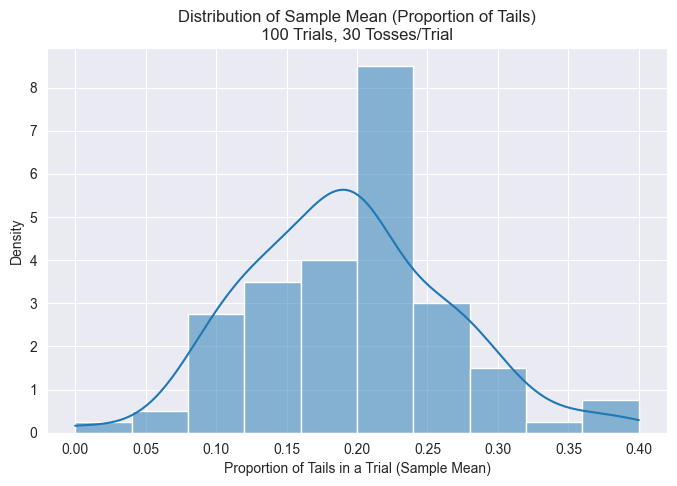

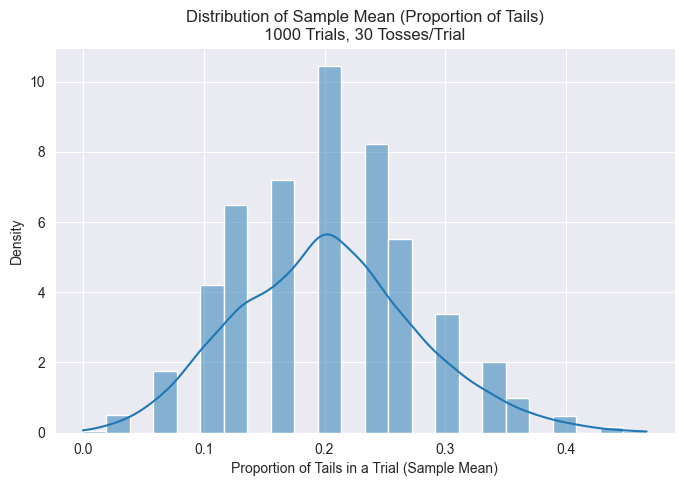

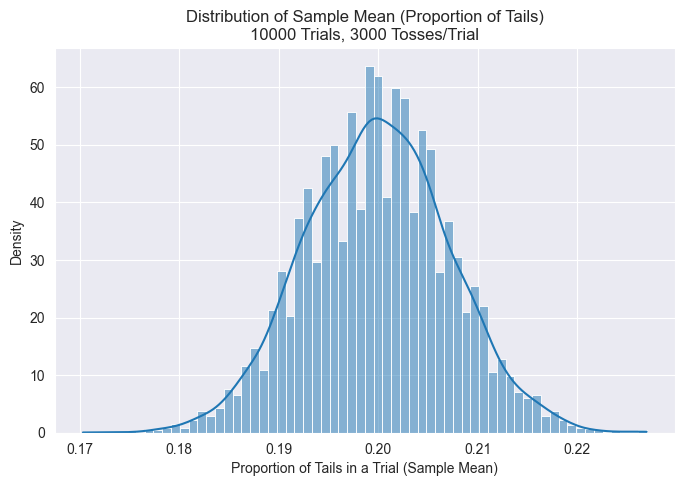

In [33]:
proportions = run_experiment(number_of_trials= 100, number_of_tosses= 30, probabilities=[0.8,0.2])
plot_clt_histogram(proportions, number_of_tosses=30)

proportions = run_experiment(number_of_trials= 1000, number_of_tosses= 30, probabilities=[0.8,0.2])
plot_clt_histogram(proportions, number_of_tosses=30)

proportions = run_experiment(number_of_trials= 10000, number_of_tosses= 3000, probabilities=[0.8,0.2])
plot_clt_histogram(proportions, number_of_tosses=3000)


## 4. The Multivariate Normal Distribution

Now, let's extend this concept to multiple dimensions. The [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) describes the distribution of a vector of random variables, where each variable is normally distributed and potentially correlated with the others.

### Definition
For a $d$-dimensional random vector $\mathbf{x} = [x_1, x_2, ..., x_d]^T$, the multivariate normal distribution is defined by:
1.  **Mean Vector ($\mathbf{\mu}$)**: A $d$-dimensional vector representing the expected value for each dimension. $\mathbf{\mu} = [\mu_1, \mu_2, ..., \mu_d]^T$.
2.  **Covariance Matrix ($\Sigma$)**: A $d \times d$ symmetric and positive semi-definite (dodstanio półokreślona) matrix. 
    * The diagonal elements ($\Sigma_{ii}$) represent the variance of the $i$-th variable ($Var(x_i) = \sigma_i^2$).
    * The off-diagonal elements ($\Sigma_{ij}$) represent the covariance between the $i$-th and $j$-th variables ($Cov(x_i, x_j)$). Covariance indicates how two variables change together.
        * $Cov(x_i, x_j) > 0$: $x_i$ tends to increase when $x_j$ increases (positive correlation).
        * $Cov(x_i, x_j) < 0$: $x_i$ tends to decrease when $x_j$ increases (negative correlation).
        * $Cov(x_i, x_j) = 0$: $x_i$ and $x_j$ are uncorrelated (if jointly normal (wspólnie normalne), this also means they are independent).

We denote this distribution as $\mathcal{N}(\mathbf{\mu}, \Sigma)$.

### Probability Density Function (PDF)

The PDF for a $d$-dimensional vector $\mathbf{x}$ is given by:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

Where:
- $|\Sigma|$ is the determinant of the covariance matrix.
- $\Sigma^{-1}$ is the inverse of the covariance matrix.
- $(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu})$ is a quadratic form known as the Mahalanobis distance squared (kwadrat odległości Mehalanobisa), which measures the distance from $\mathbf{x}$ to the mean $\mathbf{\mu}$, accounting for (uwzględniając) the covariance structure.

Let's define a function

In [34]:
def multivariate_normal_pdf(x: np.ndarray, mean: np.ndarray, covariance: np.ndarray) -> np.ndarray:
    """
    Computes the multivariate normal PDF for a batch of input vectors `x`.

    Parameters:
        x : np.ndarray Shape (N, D), where N is the number of samples and D is the dimensionality.
        mean : np.ndarray Shape (D,), the mean vector.
        covariance : np.ndarray Shape (D, D), the covariance matrix.

    Returns:
        np.ndarray: Shape (N,), the PDF values for each input sample.
    """
    d = mean.shape[0]
    x_centered = x - mean

    
    det = np.linalg.det(covariance)
    inv = np.linalg.inv(covariance)
    norm_const = 1.0 / np.sqrt((2 * np.pi) ** d * det)

    
    exponent = -0.5 * np.sum(x_centered @ inv * x_centered, axis=1)

    return norm_const * np.exp(exponent)

### Visualization (2D Case)

Visualizing beyond 2 or 3 dimensions is difficult. Let's focus on the bivariate ($d=2$) case to understand the impact of (wpływ) the covariance matrix. We'll plot the probability density as contours (kontury).


In [35]:
def generate_surface(mean: np.ndarray, covariance: np.ndarray, num_points: int = 50, range_std_dev: int = 3):
    """
    Generates a surface grid of multivariate normal PDF values over a 2D mesh.

    Parameters:
        mean (np.ndarray): Shape (2,) or (2,1), the mean vector.
        covariance (np.ndarray): Shape (2,2), the covariance matrix.
        num_points (int): Number of points along each axis.
        range_std_dev (int): Range of standard deviations to cover.

    Returns:
        x1, x2 (np.ndarray): Meshgrid arrays.
        pdf (np.ndarray): Computed PDF values at each grid point.
        bounds (tuple): (x1_min, x1_max, x2_min, x2_max)
    """
    mean = mean.flatten()
    std_devs = np.sqrt(np.diag(covariance))

    x1_min = mean[0] - range_std_dev * std_devs[0]
    x1_max = mean[0] + range_std_dev * std_devs[0]
    x2_min = mean[1] - range_std_dev * std_devs[1]
    x2_max = mean[1] + range_std_dev * std_devs[1]

    x1s = np.linspace(x1_min, x1_max, num=num_points)
    x2s = np.linspace(x2_min, x2_max, num=num_points)
    x1, x2 = np.meshgrid(x1s, x2s)

    points = np.column_stack([x1.ravel(), x2.ravel()])
    pdf_values = multivariate_normal_pdf(points, mean, covariance)
    pdf = pdf_values.reshape(num_points, num_points)

    return x1, x2, pdf, (x1_min, x1_max, x2_min, x2_max)

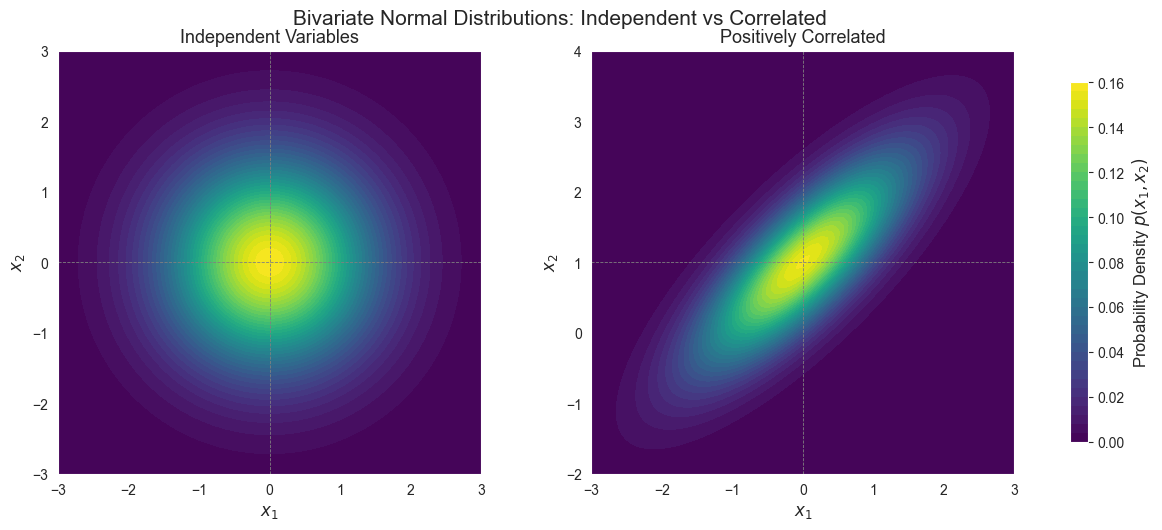

In [36]:
# Define distributions
mean1 = np.array([0., 0.])
cov1 = np.array([[1., 0.], 
                 [0., 1.]])

mean2 = np.array([0., 1.])
cov2 = np.array([[1.0, 0.8], 
                 [0.8, 1.0]])

num_points = 100
range_std = 3
x1_1, x2_1, pdf1, lim1 = generate_surface(mean1, cov1, num_points, range_std)
x1_2, x2_2, pdf2, lim2 = generate_surface(mean2, cov2, num_points, range_std)

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
levels = 40
cmap = cm.viridis

# Plot: Independent
cf1 = axes[0].contourf(x1_1, x2_1, pdf1, levels=levels, cmap=cmap)
axes[0].set_title("Independent Variables", fontsize=13)
axes[0].set_xlabel(r'$x_1$', fontsize=12)
axes[0].set_ylabel(r'$x_2$', fontsize=12)
axes[0].set_aspect('equal')
axes[0].axhline(mean1[1], color='gray', ls='--', lw=0.6)
axes[0].axvline(mean1[0], color='gray', ls='--', lw=0.6)

# Plot: Correlated
cf2 = axes[1].contourf(x1_2, x2_2, pdf2, levels=levels, cmap=cmap)
axes[1].set_title("Positively Correlated", fontsize=13)
axes[1].set_xlabel(r'$x_1$', fontsize=12)
axes[1].set_ylabel(r'$x_2$', fontsize=12)
axes[1].set_aspect('equal')
axes[1].axhline(mean2[1], color='gray', ls='--', lw=0.6)
axes[1].axvline(mean2[0], color='gray', ls='--', lw=0.6)

cbar = fig.colorbar(cf1, ax=axes, orientation='vertical', shrink=0.85, pad=0.05)
cbar.set_label(r'Probability Density $p(x_1, x_2)$', fontsize=12)
fig.suptitle('Bivariate Normal Distributions: Independent vs Correlated', fontsize=15, y=1.03)
plt.show()

**Observations:**
- **Independent Case:** The contours are circular (or elliptical aligned with (wyrównane) axes if variances differ). The distribution spreads equally along the axes defined by the standard deviations ($\sigma_1 = \sqrt{1}=1, \sigma_2 = \sqrt{1}=1$).
- **Correlated Case:** The contours are elliptical and tilted (nachylone). The positive covariance (0.8) means that higher values of $x_1$ are associated with higher values of $x_2$. The main axis of the ellipse reflects (odzwierciedlają) this correlation direction. The mean vector shifts the center of the distribution to $(0, 1)$.

### Exercise 4: Visualizing Covariance Matrices

Explore how different covariance matrices affect the shape and orientation of a 2D normal distribution centered at $\mathbf{\mu} = [0, 0]^T$.

**Task:** For each of the covariance matrices below, use the `generate_surface` function to plot the corresponding 2D normal distribution. Describe your observations for each case – how does the shape/orientation relate to the values in the covariance matrix?

1.  `cov_a = np.array([[2.0, 0.0], [0.0, 0.5]])`
2.  `cov_b = np.array([[1.0, -0.7], [-0.7, 1.0]])`
3.  `cov_c = np.array([[1.5, 0.9], [0.9, 1.5]])`


Text(0.5, 1.03, 'Bivariate Normal Distributions for different covariance matrix')

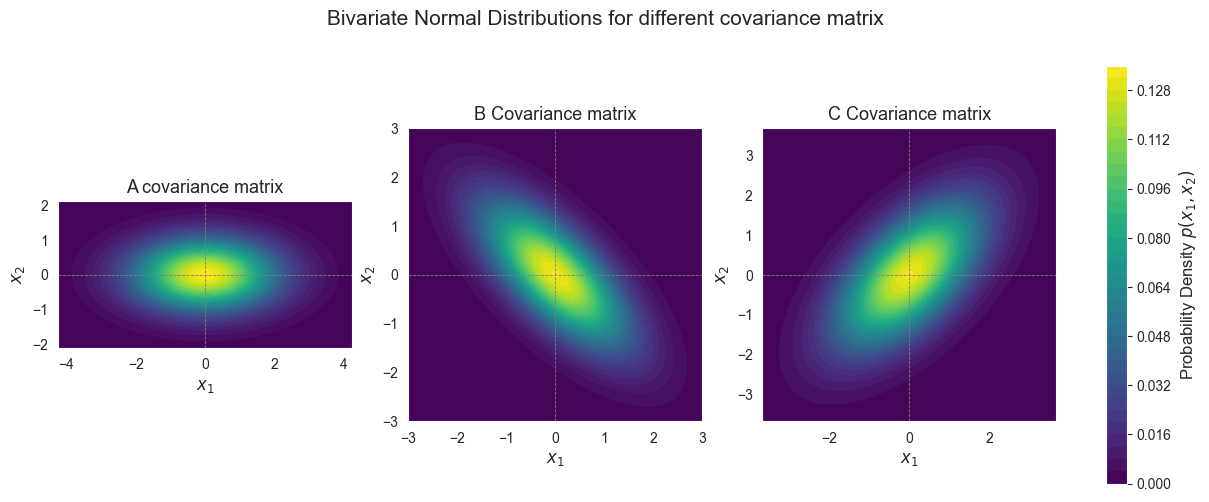

In [43]:
mean_abc = np.array([0., 0.])

cov_a = np.array([[2., 0.], 
                 [0., 0.5]])

cov_b = np.array([[1.0, -0.7],
                 [-0.7, 1.0]])

cov_c = np.array([[1.5, 0.9],
                 [0.9 ,1.5]])

num_points = 100
range_std = 3

x1_1, x2_1, pdf1, lim1 = generate_surface(mean_abc, cov_a, num_points, range_std)
x1_2, x2_2, pdf2, lim2 = generate_surface(mean_abc, cov_b, num_points, range_std)
x1_3, x2_3, pdf3, lim3 = generate_surface(mean_abc, cov_c, num_points, range_std)

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(12, 5), constrained_layout=True)
levels = 40
cmap = cm.viridis

# first
cf1 = axes[0].contourf(x1_1, x2_1, pdf1, levels=levels, cmap=cmap)
axes[0].set_title("A covariance matrix", fontsize=13)
axes[0].set_xlabel(r'$x_1$', fontsize=12)
axes[0].set_ylabel(r'$x_2$', fontsize=12)
axes[0].set_aspect('equal')
axes[0].axhline(mean_abc[1], color='gray', ls='--', lw=0.6)
axes[0].axvline(mean_abc[0], color='gray', ls='--', lw=0.6)

# second
cf2 = axes[1].contourf(x1_2, x2_2, pdf2, levels=levels, cmap=cmap)
axes[1].set_title("B Covariance matrix", fontsize=13)
axes[1].set_xlabel(r'$x_1$', fontsize=12)
axes[1].set_ylabel(r'$x_2$', fontsize=12)
axes[1].set_aspect('equal')
axes[1].axhline(mean_abc[1], color='gray', ls='--', lw=0.6)
axes[1].axvline(mean_abc[0], color='gray', ls='--', lw=0.6)

# third
cf3 = axes[2].contourf(x1_3, x2_3, pdf3, levels=levels, cmap=cmap)
axes[2].set_title("C Covariance matrix", fontsize=13)
axes[2].set_xlabel(r'$x_1$', fontsize=12)
axes[2].set_ylabel(r'$x_2$', fontsize=12)
axes[2].set_aspect('equal')
axes[2].axhline(mean_abc[1], color='gray', ls='--', lw=0.6)
axes[2].axvline(mean_abc[0], color='gray', ls='--', lw=0.6)

cbar = fig.colorbar(cf3, ax=axes, orientation='vertical', shrink=0.85, pad=0.05)
cbar.set_label(r'Probability Density $p(x_1, x_2)$', fontsize=12)
fig.suptitle('Bivariate Normal Distributions for different covariance matrix', fontsize=15, y=1.03)

A Covariance matrix:  
The distribution is elliptical and horizontally stretched, with ellipse axes aligned with the coordinate system axes.  
What means that: there is no corelation between variables, they are independent.  
Large variance in \(x_1\) (2.0) - horizontal stretching.  
Small variance in \(x_2\) (0.5) - vertical compression.

B Covariance matrix:  
Observation: The ellipse is tilted in the negative direction.  
What means that:  there is corelation between variables, they are negative corelated (−0.7)  
As \(x_1\) increases, \(x_2\) tends to decrease.

C Covariance matrix:  
The ellipse is tilted in the positive direction.  
What means that:  there is corelation between variables, they are positive corelated (0.9)  
As \(x_1\) increases, \(x_2\) also increases.





### Exercise 5*: Eigen-decomposition and Geometric Interpretation

**Goal:** To visually confirm (potwierdzić) how the mathematical components of the covariance matrix ($\Sigma$) determine the geometric shape of the 2D normal distribution.

**Core Idea:**
The **eigenvectors** of $\Sigma$ point along (wskazują kierunek) the principal axes (major (duża) and minor (mała) axes) of the probability density ellipse, defining (określając) its **orientation**.  
The **square root of the eigenvalues** ($\sqrt{\lambda_i}$) correspond to (odpowiada) the **standard deviation** of the distribution along those principal axes,  
defining the **spread** (rozciągnięcie) or scale along each axis.  

**Task:**

1.  **Choose Parameters:** Select a 2D mean vector $\mu$ (e.g., `[0, 0]`) and a *non-diagonal* covariance matrix $\Sigma$ from the previous exercise (e.g., `cov_b` or `cov_c`).
2.  **Calculate Decomposition:** Use `np.linalg.eig` to compute the eigenvalues ($\lambda_i$) and eigenvectors ($V$) of your chosen $\Sigma$.
3.  **Plot Contours:** Use the `generate_surface` function and `plt.contourf` to plot the probability density contours for your chosen $\mu$ and $\Sigma$.
4.  **Plot Eigenvector Axes:** On the *same plot*:
    * For each eigenvector, draw a line starting at the mean $\mu$.
    * The line should point (skierowana) in the eigenvector's direction.
    * The length of the line should represent the spread along that axis. A good choice is to make the total length $2 \times \text{scale\_factor} \times \sqrt{\lambda_i}$ (e.g., `scale_factor=2` for $\pm 2$ standard deviations), centered at the mean. Use `plt.plot` or `ax.quiver`.
5.  **Interpret:** Observe your plot. Do the lines you drew (representing the scaled eigenvectors) align perfectly with the ellipse's axes? Does the length of each line correspond to the spread (width/height) of the ellipse along that direction?

*(Remember to use `ax.set_aspect('equal')` for accurate geometric representation!)*

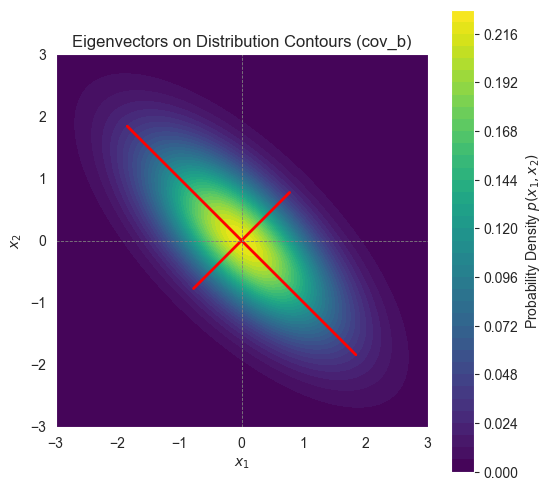

In [46]:
scale_factor = 2
mean = np.array([0., 0.])
cov_b = np.array([[1.0, -0.7],
                  [-0.7, 1.0]])

eigenvalues, eigenvectors = np.linalg.eig(cov_b)

x1, x2, pdf, lim1 = generate_surface(mean, cov_b, num_points=100, range_std_dev=3)


fig, ax = plt.subplots(figsize=(6, 6))
contour = ax.contourf(x1, x2, pdf, levels=40, cmap=cm.viridis)

# Draw principal axes
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i]
    length = scale_factor * np.sqrt(eigenvalues[i])

    
    start = mean - vec * length
    end = mean + vec * length

    ax.plot([start[0], end[0]], [start[1], end[1]], color='red', lw=2)


ax.set_title("Eigenvectors on Distribution Contours (cov_b)")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.axhline(mean[1], color='gray', ls='--', lw=0.6)
ax.axvline(mean[0], color='gray', ls='--', lw=0.6)
ax.set_aspect('equal')

plt.colorbar(contour, ax=ax, label=r"Probability Density $p(x_1, x_2)$")
plt.show()

Yes, the lines representing the scaled eigenvectors align perfectly with the ellipse's axes.  
The length of each line also corresponds to the spread of the ellipse along that direction.  
The longer eigenvector defines the major axis, while the shorter one defines the minor axis.  